In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('../data/raw/csv/03-11/UDPLag.csv')
data.columns = [x.strip() for x in data.columns]
print(data.shape)
data.head()

/home/caiolmart/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(725165, 88)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,50880,172.16.0.5-192.168.50.4-35468-49856-17,172.16.0.5,35468,192.168.50.4,49856,17,2018-11-03 11:01:43.652742,47,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP
1,83164,172.16.0.5-192.168.50.4-44167-44225-17,172.16.0.5,44167,192.168.50.4,44225,17,2018-11-03 11:01:43.653107,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP
2,49389,172.16.0.5-192.168.50.4-36215-28771-17,172.16.0.5,36215,192.168.50.4,28771,17,2018-11-03 11:01:43.653383,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP
3,34687,172.16.0.5-192.168.50.4-44168-43679-17,172.16.0.5,44168,192.168.50.4,43679,17,2018-11-03 11:01:43.653386,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP
4,87466,172.16.0.5-192.168.50.4-52334-44960-17,172.16.0.5,52334,192.168.50.4,44960,17,2018-11-03 11:01:43.653387,880701,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP


In [37]:
data.tail()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
725160,587239,172.16.0.5-192.168.50.4-38133-51501-6,172.16.0.5,38133,192.168.50.4,51501,6,2018-11-03 11:30:25.829961,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
725161,240180,172.16.0.5-192.168.50.4-38134-22514-6,172.16.0.5,38134,192.168.50.4,22514,6,2018-11-03 11:30:25.830168,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
725162,12919,172.16.0.5-192.168.50.4-38135-54928-6,172.16.0.5,38135,192.168.50.4,54928,6,2018-11-03 11:30:25.830169,105,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
725163,500419,172.16.0.5-192.168.50.4-38136-50486-6,172.16.0.5,38136,192.168.50.4,50486,6,2018-11-03 11:30:25.830219,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
725164,51957,172.16.0.5-192.168.50.4-38137-40037-6,172.16.0.5,38137,192.168.50.4,40037,6,2018-11-03 11:30:25.830379,47,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn


In [43]:
data['Label'].value_counts()

Syn       606749
UDP       112475
BENIGN      4068
UDPLag      1873
Name: Label, dtype: int64

In [39]:
datacols = list(data.columns)
datacols[:5]

['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP']

In [2]:
udp_lag_cols = ['ACK Flag Count',
                'Init_Win_bytes_forward',
                'min_seg_size_forward',
                'Fwd IAT Mean',
                'Fwd IAT Max']

mssql_cols = ['Fwd Packets/s',
              'Protocol']

ldap_cols = ['Max Packet Length',
             'Fwd Packet Length Max',
             'Fwd Packet Length Min',
             'Average Packet Size',
             'Min Packet Length']

netbios_cols = ['Fwd Packets/s',
                'min_seg_size_forward',
                'Protocol',
                'Fwd Header Length',
                'Fwd Header Length.1']

syn_cols = ['ACK Flag Count',
            'Init_Win_bytes_forward',
            'min_seg_size_forward',
            'Fwd IAT Total',
            'Flow Duration']

portmap_cols = ['ACK Flag Count',
                'Init_Win_bytes_forward',
                'Fwd Packet Length Std',
                'Packet Length Std',
                'min_seg_size_forward']


udp_cols = ['Destination Port',
            'Fwd Packet Length Std',
            'Packet Length Std',
            'min_seg_size_forward',
            'Protocol']

attacks = {'UDPLag': udp_lag_cols,
           'MSSQL': mssql_cols,
           'LDAP': ldap_cols,
           'NetBIOS': netbios_cols,
           'Syn': syn_cols,
           'Portmap': portmap_cols,
           'UDP': udp_cols}

## Labels

Reading data UDPLag


/home/caiolmart/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done. Data has shape (725165, 88).
Reading data MSSQL
Done. Data has shape (5775786, 88).
Reading data LDAP
Done. Data has shape (2113234, 88).
Reading data NetBIOS
Done. Data has shape (3455899, 88).
Reading data Syn
Done. Data has shape (4320541, 88).
Reading data Portmap
Done. Data has shape (191694, 88).
Reading data UDP
Done. Data has shape (3782206, 88).


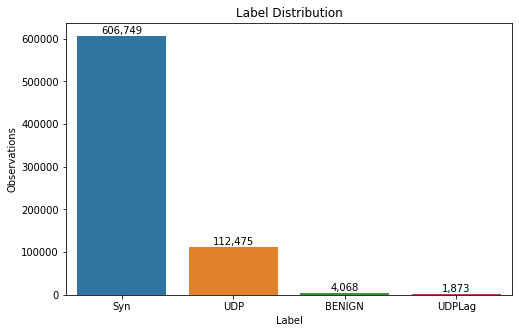

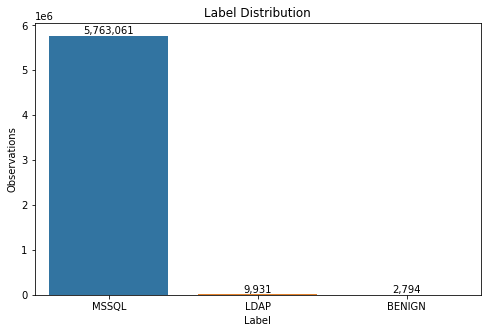

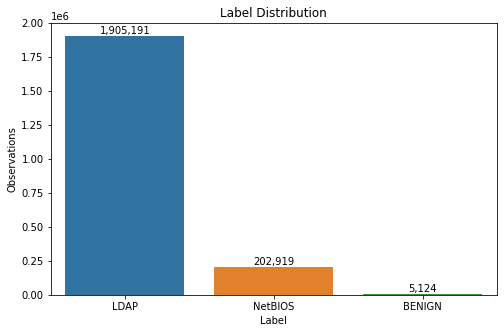

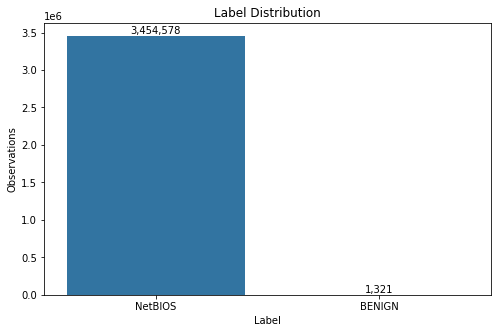

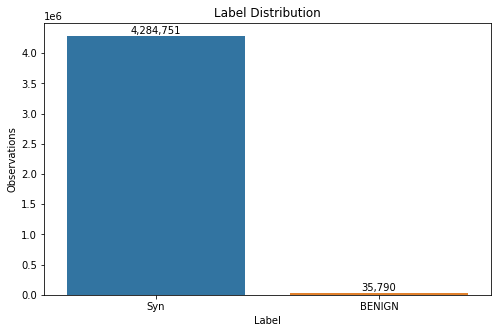

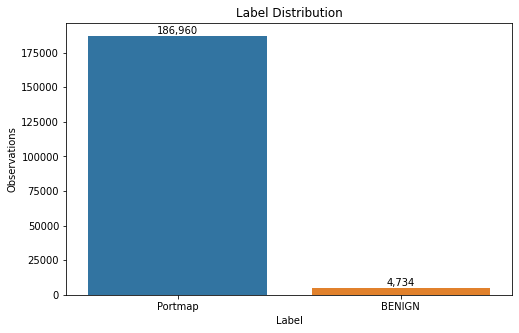

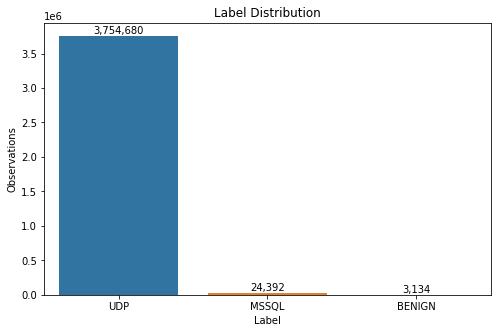

In [4]:
for attack in attacks.keys():
    print(f'Reading data {attack}')
    data = pd.read_csv(f'../data/raw/csv/03-11/{attack}.csv')
    print(f'Done. Data has shape {data.shape}.')
    data.columns = [x.strip() for x in data.columns]
    
    df_plot = data.Label.value_counts()
    df_plot = pd.DataFrame(df_plot).reset_index()

    plt.figure(figsize=(8,5))

    sns.barplot(x='index', y='Label', data=df_plot)

    plt.xlabel('Label')
    plt.ylabel('Observations')

    for i, val in enumerate(df_plot.Label):
        plt.text(i, val, f'{val:,}', horizontalalignment='center', verticalalignment='bottom')
    plt.title('Label Distribution')
    plt.savefig(f'../plots/train_analysis/labels/{attack}.png')

## Variables distributuion

Reading data UDPLag


/home/caiolmart/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done. Data has shape (725165, 88).
Reading data MSSQL


/home/caiolmart/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done. Data has shape (5775786, 88).
Reading data LDAP


/home/caiolmart/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done. Data has shape (2113234, 88).
Reading data NetBIOS


/home/caiolmart/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done. Data has shape (3455899, 88).
Reading data Syn


/home/caiolmart/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done. Data has shape (4320541, 88).
Reading data Portmap


/home/caiolmart/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done. Data has shape (191694, 88).
Reading data UDP


/home/caiolmart/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done. Data has shape (3782206, 88).


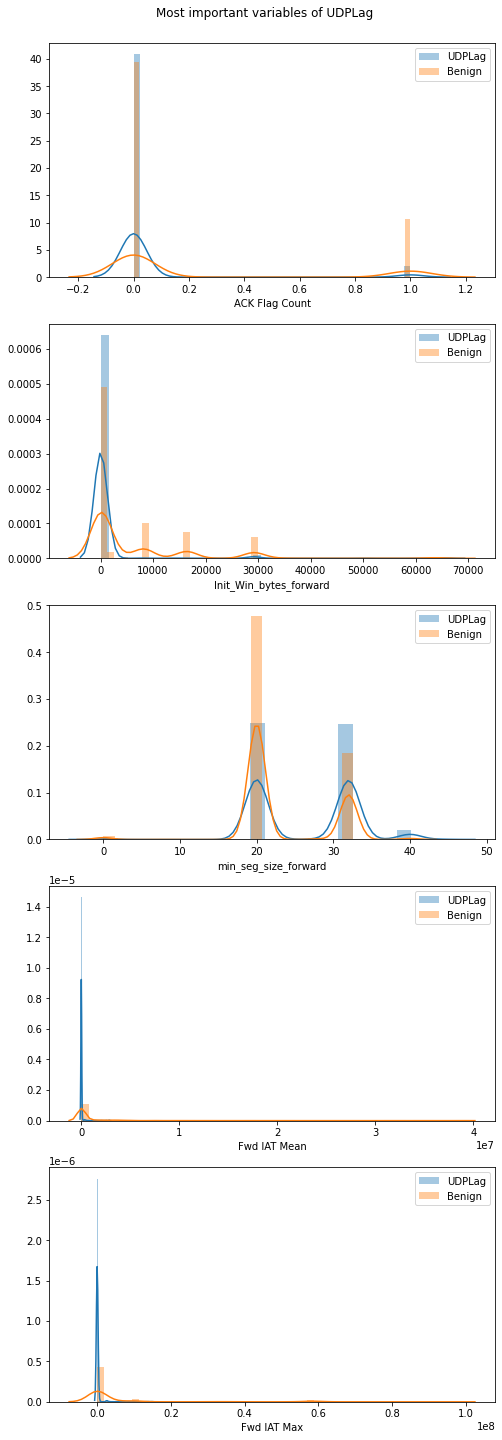

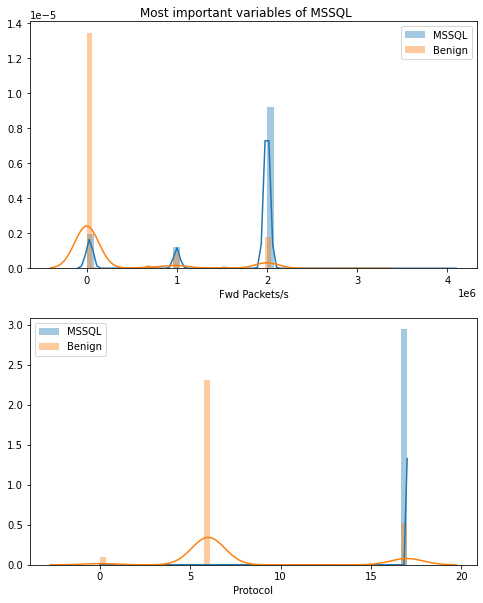

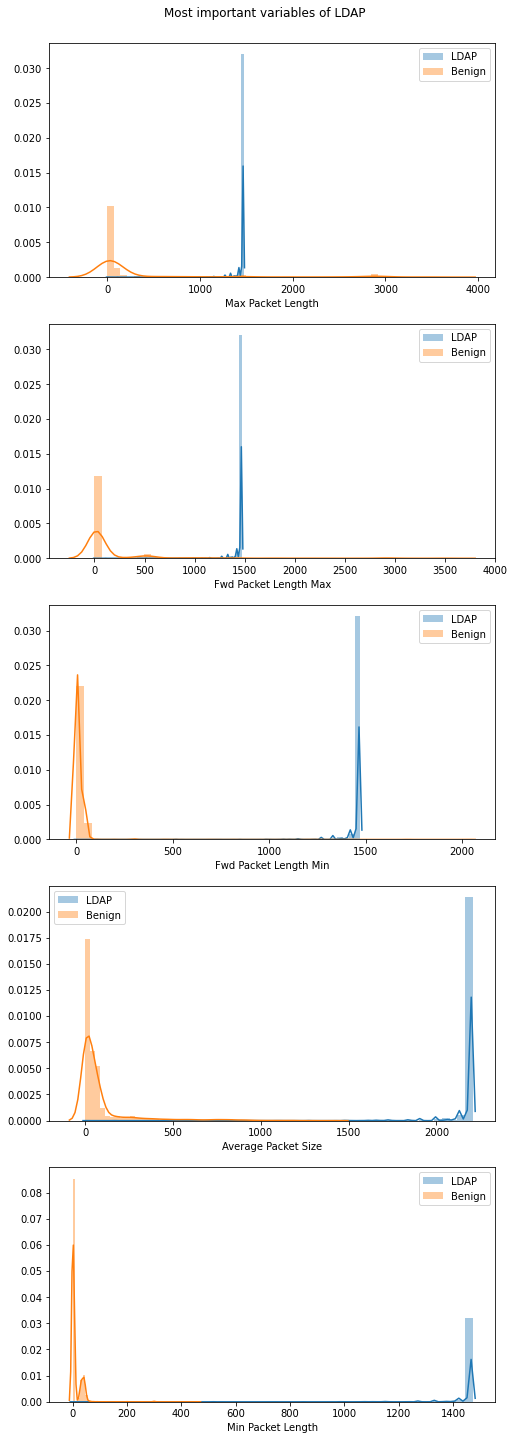

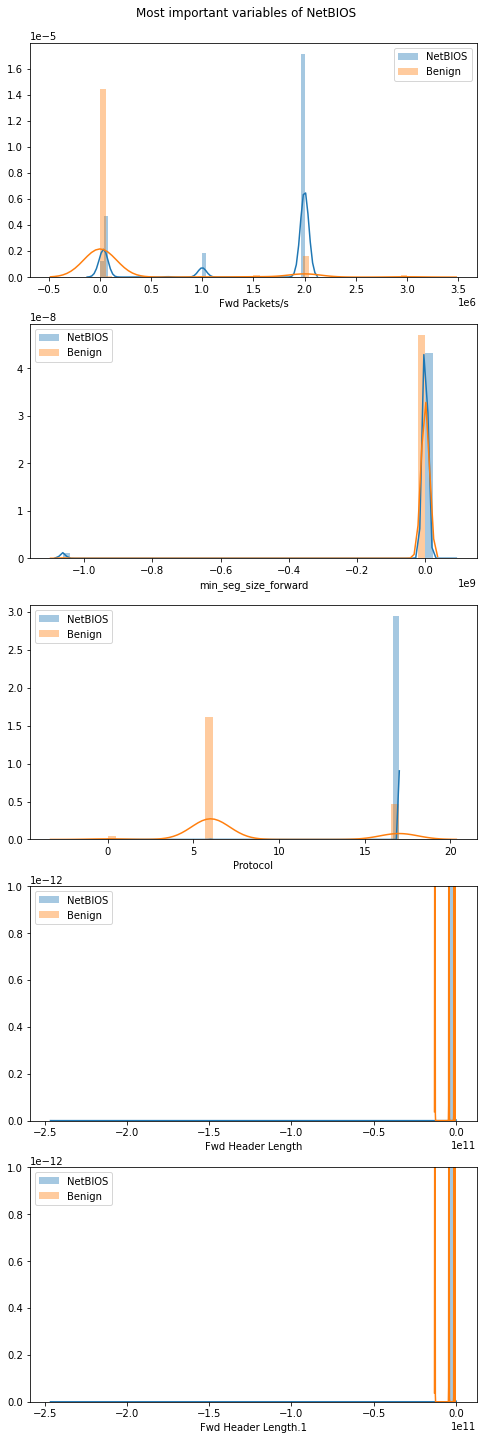

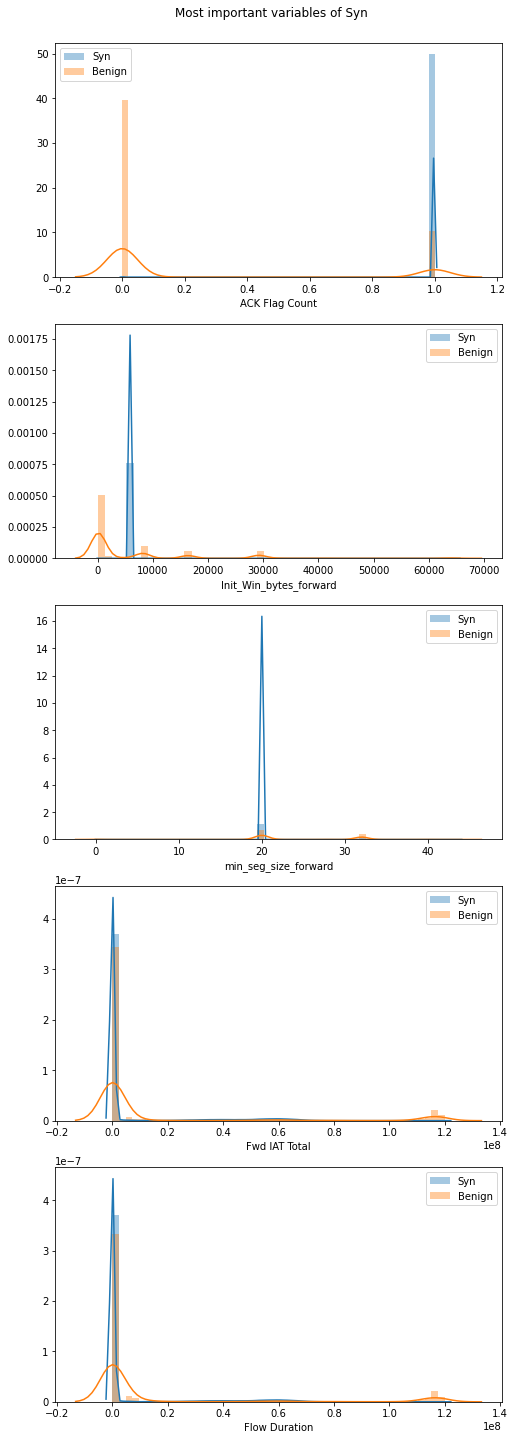

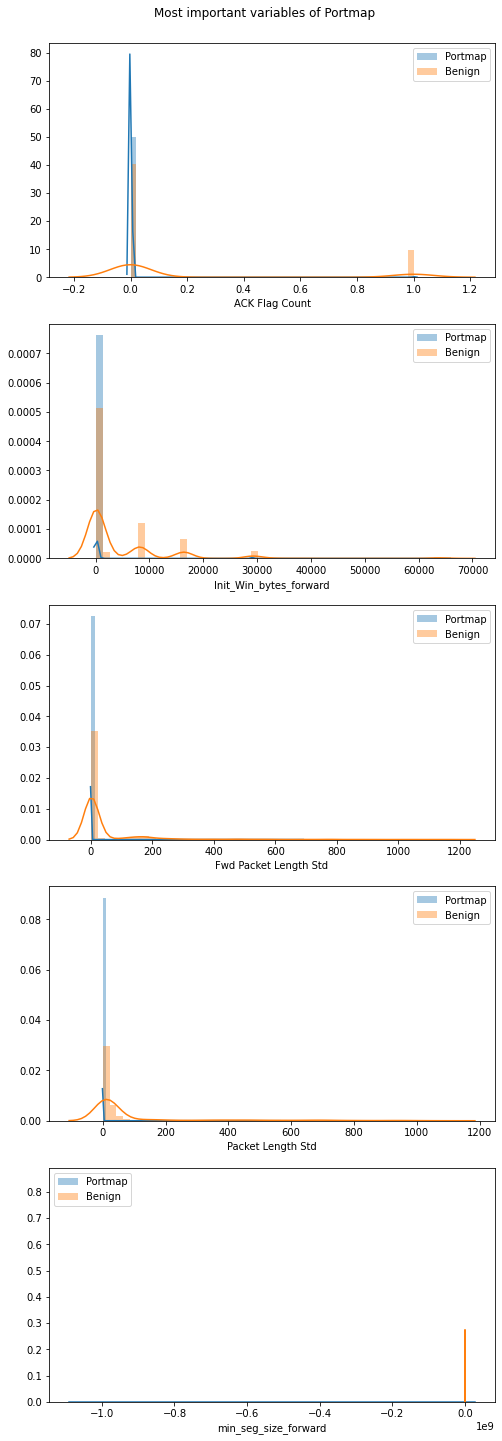

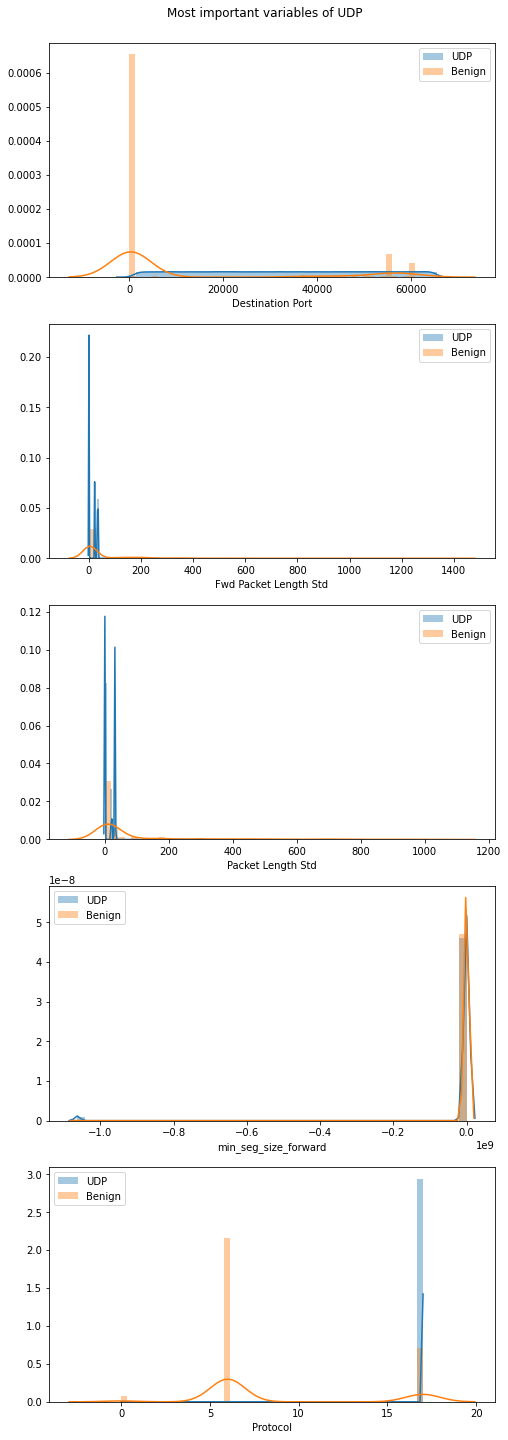

In [22]:
for attack, cols in attacks.items():
    print(f'Reading data {attack}')
    data = pd.read_csv(f'../data/raw/csv/03-11/{attack}.csv')
    print(f'Done. Data has shape {data.shape}.')
    data.columns = [x.strip() for x in data.columns]
    
    nsub = len(cols)
    fig, axs = plt.subplots(nsub, figsize=(8, 5 * nsub))
    fig.suptitle(f'Most important variables of {attack}', y=0.9)
    for i in range(nsub):
        sns.distplot(data[data.Label == attack][cols[i]], ax=axs[i], label=attack)
        sns.distplot(data[data.Label == 'BENIGN'][cols[i]], ax=axs[i], label='Benign')
        axs[i].legend()
    plt.savefig(f'../plots/train_analysis/var_distributions/{attack}.png')